In [246]:
import numpy as np
import pandas as pd
import string

In [247]:
# Import distribution of population by age and sex for Georgia

geopop = pd.read_excel('https://geostat.ge/media/22649/02---population-by-sex-and-age.xlsx', skiprows=2, dtype=str)
# if link does not work, import ~/02---population-by-sex-and-age.xlsx file directly 

geopop.head()

,age,1994,Unnamed: 2,Unnamed: 3,1995,Unnamed: 5,Unnamed: 6,1996,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,2017,Unnamed: 71,Unnamed: 72,2018,Unnamed: 74,Unnamed: 75,2019,Unnamed: 77,Unnamed: 78
0,NaN,Both Sexes,Males,Females,Both Sexes,Males,Females,Both Sexes,Males,Females,...,Females,Both Sexes,Males,Females,Both Sexes,Males,Females,Both Sexes,Males,Females
1,Total,4929.9,2333,2596.9000000000005,4742.251,2245.3340000000003,2496.9169999999995,4573.191999999999,2166.5019999999995,2406.6900000000005,...,1944.9190000000003,3726.3740000000003,1785.606,1940.7680000000005,3729.6330000000003,1791.5589999999997,1938.074,3723.464,1790.899,1932.565
2,0,59.699999999999996,31.199999999999996,28.5,55.449,29.246,26.203,54.400999999999996,28.693,25.708,...,28.256,56.465,28.802,27.663,53.208,27.615,25.593,50.991,26.45,24.541
3,1-4,294.4,151.5,142.9,274.44899999999996,141.742,132.707,256.052,132.78,123.272,...,100.732,217.91899999999998,113.182,104.737,224.997,116.247,108.75,228.645,118.18,110.465
4,5-9,377.6,192.8,184.8,356.313,182.643,173.67,336.78,173.272,163.508,...,116.026,251.31599999999997,131.527,119.789,255.985,133.711,122.274,256.101,133.324,122.777


In [248]:
# Import georgian annual death numbers by age and sex

geodeath = pd.read_excel('https://geostat.ge/media/30562/20---number-of-deaths-by-age-and-sex.xlsx', skiprows=3, dtype=str)
# if link does not work, import ~/20---number-of-deaths-by-age-and-sex.xlsx 

geodeath.head()

,age,1994,Unnamed: 2,Unnamed: 3,1995,Unnamed: 5,Unnamed: 6,1996,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,2017,Unnamed: 71,Unnamed: 72,2018,Unnamed: 74,Unnamed: 75,2019,Unnamed: 77,Unnamed: 78
0,NaN,Both sexes,Males,Females,Both sexes,Males,Females,Both sexes,Males,Females,...,Females,Both sexes,Males,Females,Both sexes,Males,Females,Both sexes,Males,Females
1,Total,50326,25300,25026,49219,24616,24603,48251,23815,24436,...,24673,47822,24423,23399,46524,23836,22688,46659,24019,22640
2,0,1680,1000,680,1652,986,666,1651,987,664,...,215,512,278,234,416,246,170,380,214,166
3,1-4,349,177,172,246,129,117,190,105,85,...,39,82,49,33,83,39,44,72,40,32
4,5-9,124,76,48,122,71,51,120,71,49,...,22,55,34,21,55,33,22,34,20,14


In [249]:
# Fix the column names of standard geostat data sheets for age and sex

def fix_column_names(raw_data, colspec=None):
    '''
    raw_data: ------------------ dataframe
    colspec (optional): -------- string (for example title of the dataframe) to be prefixed to all column names
    '''
    
    # If the function has already been applied to raw_data earlier, this will return it unchanged:
    if raw_data.iloc[0,0]=='Total':
        data = raw_data
        return data
    
    old_column_names = raw_data.columns.values.tolist()
    row0_values = raw_data.loc[0].values.tolist()

    new_column_names = [str(name) if type(name) is not str else '' for name in old_column_names]
    row0_values = [value if value==value else '' for value in row0_values]

    for i in range(len(new_column_names)):
        if new_column_names[i]=='' and i!=0:
            new_column_names[i] = new_column_names[i-1]

    new_column_names = [a+b+c for a,b,c in zip(new_column_names, ['age']+[' ']*(len(new_column_names)-1), row0_values)]
    new_column_names = [string.capwords(colname) for colname in new_column_names]

    raw_data = raw_data.rename(dict(zip(old_column_names, new_column_names)), axis=1)
    raw_data = raw_data.iloc[1:]
    data = raw_data.set_index('Age')
    
    # optional argument colspec(str)
    if colspec is not None:
        try:
            old_col_names = data.columns.values.tolist()
            new_col_names = zip([colspec]*len(old_col_names), old_col_names)
            new_col_names = [a+b for a,b in new_col_names]
            col_map = dict(zip(old_col_names, new_col_names))
            data = data.rename(col_map, axis=1)
        except:
            print('Error while trying to add column specification.')

    return data

In [250]:
geopop = fix_column_names(geopop, 'Georgia Population ')
geopop.head()

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,Georgia Population 2016 Females,Georgia Population 2017 Both Sexes,Georgia Population 2017 Males,Georgia Population 2017 Females,Georgia Population 2018 Both Sexes,Georgia Population 2018 Males,Georgia Population 2018 Females,Georgia Population 2019 Both Sexes,Georgia Population 2019 Males,Georgia Population 2019 Females
Age,,,,,,,,,,,,,,,,,,,,,
Total,4929.9,2333,2596.9000000000005,4742.251,2245.3340000000003,2496.9169999999995,4573.191999999999,2166.5019999999995,2406.6900000000005,4410.205,...,1944.9190000000003,3726.3740000000003,1785.606,1940.7680000000005,3729.6330000000003,1791.5589999999997,1938.074,3723.464,1790.899,1932.565
0,59.699999999999996,31.199999999999996,28.5,55.449,29.246,26.203,54.400999999999996,28.693,25.708,52.764,...,28.256,56.465,28.802,27.663,53.208,27.615,25.593,50.991,26.45,24.541
1-4,294.4,151.5,142.9,274.44899999999996,141.742,132.707,256.052,132.78,123.272,238.498,...,100.732,217.91899999999998,113.182,104.737,224.997,116.247,108.75,228.645,118.18,110.465
5-9,377.6,192.8,184.8,356.313,182.643,173.67,336.78,173.272,163.508,318.273,...,116.026,251.31599999999997,131.527,119.789,255.985,133.711,122.274,256.101,133.324,122.777
10-14,404.8,205.8,199,389.995,198.913,191.082,376.41200000000003,192.612,183.8,363.34000000000003,...,97.034,207.18900000000002,109.84,97.349,210.749,111.649,99.1,218.763,115.653,103.11


In [251]:
geodeath = fix_column_names(geodeath, 'Georgia Deaths ')
geodeath.head()

,Georgia Deaths 1994 Both Sexes,Georgia Deaths 1994 Males,Georgia Deaths 1994 Females,Georgia Deaths 1995 Both Sexes,Georgia Deaths 1995 Males,Georgia Deaths 1995 Females,Georgia Deaths 1996 Both Sexes,Georgia Deaths 1996 Males,Georgia Deaths 1996 Females,Georgia Deaths 1997 Both Sexes,...,Georgia Deaths 2016 Females,Georgia Deaths 2017 Both Sexes,Georgia Deaths 2017 Males,Georgia Deaths 2017 Females,Georgia Deaths 2018 Both Sexes,Georgia Deaths 2018 Males,Georgia Deaths 2018 Females,Georgia Deaths 2019 Both Sexes,Georgia Deaths 2019 Males,Georgia Deaths 2019 Females
Age,,,,,,,,,,,,,,,,,,,,,
Total,50326,25300,25026,49219,24616,24603,48251,23815,24436,48026,...,24673,47822,24423,23399,46524,23836,22688,46659,24019,22640
0,1680,1000,680,1652,986,666,1651,987,664,1429,...,215,512,278,234,416,246,170,380,214,166
1-4,349,177,172,246,129,117,190,105,85,177,...,39,82,49,33,83,39,44,72,40,32
5-9,124,76,48,122,71,51,120,71,49,115,...,22,55,34,21,55,33,22,34,20,14
10-14,112,76,36,112,80,32,97,58,39,97,...,15,57,37,20,51,36,15,55,36,19


In [252]:
# Convert data back to numeric

geopop = geopop.astype(float)
geodeath = geodeath.astype(float)

geopop = geopop*1000

In [253]:
# Custom function to merge (add up) rows of a data frame

def merge_age_groups(data, row_groups, new_index_name='groups'):
    '''
    data: --------------- dataframe
    row_map: ------------ list of lists of indices that will be merged to one new index:
                             [[row1, ..., rowN1], [row(N1+1), ..., row(N1+N2)], ..., [row(N1+...+N(k-1)), ..., row(N1+...+Nk)]]
    '''
    data_merged_rows = pd.DataFrame(columns=data.columns.values.tolist())
    new_indices = []
        
    for i in range(len(row_groups)):
        data_merged_rows = data_merged_rows.append(data.iloc[row_groups[i]].sum(), ignore_index=True)
        indices_to_merge = data.iloc[row_groups[i]].index.values.tolist()
        new_indices.append(' and '.join(indices_to_merge))
        
    data_merged_rows[new_index_name] = new_indices
    data_merged_rows = data_merged_rows.set_index(new_index_name)
    
    return data_merged_rows

In [254]:
# Redefine age categories

'''
key for original age-groups:
0 : total
1 : 0 years
2 : 1-4 years
3 : 5-9 years
4 : 10-14 years
5 : 15-19 years
6 : 20-24 years
7 : 25-29 years
8 : 30-34 years
9 : 35-39 years
10 : 40-44 years
11 : 45-49 years
12 : 50-54 years
13 : 55-59 years
14 : 60-64 years
15 : 65-69 years
16 : 70-74 years
17 : 75-79 years
18 : 80-84 years
19 : 85+ years
'''

new_age_groups = [[0], [1,2,3,4,5], [6,7], [8,9], [10,11], [12,13], [14,15], [16,17], [18,19]]

In [255]:
# Create new dataframe with redefined age categories

geopop_merged = merge_age_groups(geopop, new_age_groups, 'Age')
geopop_merged.head(20)

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,Georgia Population 2016 Females,Georgia Population 2017 Both Sexes,Georgia Population 2017 Males,Georgia Population 2017 Females,Georgia Population 2018 Both Sexes,Georgia Population 2018 Males,Georgia Population 2018 Females,Georgia Population 2019 Both Sexes,Georgia Population 2019 Males,Georgia Population 2019 Females
Age,,,,,,,,,,,,,,,,,,,,,
Total,4929900.0,2333000.0,2596900.0,4742251.0,2245334.0,2496917.0,4573192.0,2166502.0,2406690.0,4410205.0,...,1944919.0,3726374.0,1785606.0,1940768.0,3729633.0,1791559.0,1938074.0,3723464.0,1790899.0,1932565.0
0 and 1-4 and 5-9 and 10-14 and 15-19,1528400.0,782200.0,746200.0,1454896.0,746797.0,708099.0,1390382.0,715723.0,674659.0,1327912.0,...,446232.0,948584.0,497483.0,451101.0,953519.0,499641.0,453878.0,960271.0,502756.0,457515.0
20-24 and 25-29,771200.0,377300.0,393900.0,734580.0,360405.0,374175.0,700938.0,344937.0,356001.0,668943.0,...,258655.0,508559.0,258796.0,249763.0,497980.0,254894.0,243086.0,483021.0,248361.0,234660.0
30-34 and 35-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,261796.0,520752.0,258340.0,262412.0,524706.0,261520.0,263186.0,524210.0,261669.0,262541.0
40-44 and 45-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,246764.0,478428.0,233415.0,245013.0,477608.0,234335.0,243273.0,475607.0,234200.0,241407.0
50-54 and 55-59,598600.0,280600.0,318000.0,501491.0,232041.0,269450.0,471993.0,217291.0,254702.0,444173.0,...,276592.0,510717.0,237752.0,272965.0,506374.0,236989.0,269385.0,498661.0,234397.0,264264.0
60-64 and 65-69,461000.0,193700.0,267300.0,451563.0,190820.0,260743.0,442832.0,188167.0,254665.0,434298.0,...,222205.0,401760.0,172284.0,229476.0,410695.0,176342.0,234353.0,420742.0,181079.0,239663.0
70-74 and 75-79,251500.0,89800.0,161700.0,252125.0,91572.0,160553.0,252806.0,93210.0,159596.0,253249.0,...,153477.0,238419.0,89012.0,149407.0,234886.0,87797.0,147089.0,231819.0,87038.0,144781.0
80-84 and 85+,84300.0,23700.0,60600.0,81711.0,22848.0,58863.0,79410.0,22074.0,57336.0,77195.0,...,79198.0,119155.0,38524.0,80631.0,123865.0,40041.0,83824.0,129133.0,41399.0,87734.0


In [256]:
# Create new dataframe with redefined age categories

geodeath_merged = merge_age_groups(geodeath, new_age_groups, 'Age')
geodeath_merged.head()

,Georgia Deaths 1994 Both Sexes,Georgia Deaths 1994 Males,Georgia Deaths 1994 Females,Georgia Deaths 1995 Both Sexes,Georgia Deaths 1995 Males,Georgia Deaths 1995 Females,Georgia Deaths 1996 Both Sexes,Georgia Deaths 1996 Males,Georgia Deaths 1996 Females,Georgia Deaths 1997 Both Sexes,...,Georgia Deaths 2016 Females,Georgia Deaths 2017 Both Sexes,Georgia Deaths 2017 Males,Georgia Deaths 2017 Females,Georgia Deaths 2018 Both Sexes,Georgia Deaths 2018 Males,Georgia Deaths 2018 Females,Georgia Deaths 2019 Both Sexes,Georgia Deaths 2019 Males,Georgia Deaths 2019 Females
Age,,,,,,,,,,,,,,,,,,,,,
Total,50326.0,25300.0,25026.0,49219.0,24616.0,24603.0,48251.0,23815.0,24436.0,48026.0,...,24673.0,47822.0,24423.0,23399.0,46524.0,23836.0,22688.0,46659.0,24019.0,22640.0
0 and 1-4 and 5-9 and 10-14 and 15-19,2536.0,1530.0,1006.0,2358.0,1418.0,940.0,2282.0,1373.0,909.0,2012.0,...,325.0,809.0,465.0,344.0,710.0,427.0,283.0,653.0,395.0,258.0
20-24 and 25-29,1134.0,881.0,253.0,986.0,739.0,247.0,755.0,552.0,203.0,726.0,...,114.0,500.0,400.0,100.0,457.0,353.0,104.0,386.0,293.0,93.0
30-34 and 35-39,1718.0,1329.0,389.0,1576.0,1170.0,406.0,1318.0,969.0,349.0,1508.0,...,233.0,836.0,649.0,187.0,788.0,606.0,182.0,784.0,610.0,174.0
40-44 and 45-49,2414.0,1684.0,730.0,2539.0,1788.0,751.0,2500.0,1751.0,749.0,2503.0,...,478.0,1968.0,1485.0,483.0,1838.0,1411.0,427.0,1804.0,1406.0,398.0


In [257]:
# Merge population and death statistics into one dataframe

geodata = pd.concat([geopop_merged, geodeath_merged], axis=1, sort=False)
geodata.head()

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,Georgia Deaths 2016 Females,Georgia Deaths 2017 Both Sexes,Georgia Deaths 2017 Males,Georgia Deaths 2017 Females,Georgia Deaths 2018 Both Sexes,Georgia Deaths 2018 Males,Georgia Deaths 2018 Females,Georgia Deaths 2019 Both Sexes,Georgia Deaths 2019 Males,Georgia Deaths 2019 Females
Age,,,,,,,,,,,,,,,,,,,,,
Total,4929900.0,2333000.0,2596900.0,4742251.0,2245334.0,2496917.0,4573192.0,2166502.0,2406690.0,4410205.0,...,24673.0,47822.0,24423.0,23399.0,46524.0,23836.0,22688.0,46659.0,24019.0,22640.0
0 and 1-4 and 5-9 and 10-14 and 15-19,1528400.0,782200.0,746200.0,1454896.0,746797.0,708099.0,1390382.0,715723.0,674659.0,1327912.0,...,325.0,809.0,465.0,344.0,710.0,427.0,283.0,653.0,395.0,258.0
20-24 and 25-29,771200.0,377300.0,393900.0,734580.0,360405.0,374175.0,700938.0,344937.0,356001.0,668943.0,...,114.0,500.0,400.0,100.0,457.0,353.0,104.0,386.0,293.0,93.0
30-34 and 35-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,233.0,836.0,649.0,187.0,788.0,606.0,182.0,784.0,610.0,174.0
40-44 and 45-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,478.0,1968.0,1485.0,483.0,1838.0,1411.0,427.0,1804.0,1406.0,398.0


In [258]:
# Calculate risk of death within the next year (ROD-1y) for 2018:

years_ROD = ['2015', '2016', '2017', '2018']  # data before 2015 seem to be a retro-projection
years_ROD_plus1 = ['2016', '2017', '2018', '2019']
sexes_ROD = ['Both Sexes', 'Males', 'Females']

for y in years_ROD:
    y_plus1 = y[:-1] + str(int(y[-1])+1)
    for sex in sexes_ROD:
        geodata['ROD-1y ' + y + ' ' + sex] = geodata['Georgia Deaths ' + y + ' ' + sex] / geodata[['Georgia Population ' + y + ' ' + sex, 'Georgia Population ' + y_plus1 + ' ' + sex]].mean(axis=1)

geodata.head()

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,ROD-1y 2015 Females,ROD-1y 2016 Both Sexes,ROD-1y 2016 Males,ROD-1y 2016 Females,ROD-1y 2017 Both Sexes,ROD-1y 2017 Males,ROD-1y 2017 Females,ROD-1y 2018 Both Sexes,ROD-1y 2018 Males,ROD-1y 2018 Females
Age,,,,,,,,,,,,,,,,,,,,,
Total,4929900.0,2333000.0,2596900.0,4742251.0,2245334.0,2496917.0,4573192.0,2166502.0,2406690.0,4410205.0,...,0.012301,0.013621,0.014624,0.012699,0.012828,0.013655,0.012065,0.012484,0.013307,0.011723
0 and 1-4 and 5-9 and 10-14 and 15-19,1528400.0,782200.0,746200.0,1454896.0,746797.0,708099.0,1390382.0,715723.0,674659.0,1327912.0,...,0.000778,0.000887,0.001034,0.000724,0.000851,0.000933,0.000760,0.000742,0.000852,0.000621
20-24 and 25-29,771200.0,377300.0,393900.0,734580.0,360405.0,374175.0,700938.0,344937.0,356001.0,668943.0,...,0.000449,0.001007,0.001550,0.000448,0.000994,0.001557,0.000406,0.000932,0.001403,0.000435
30-34 and 35-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,0.000729,0.001903,0.002937,0.000889,0.001599,0.002497,0.000712,0.001503,0.002317,0.000692
40-44 and 45-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,0.002145,0.004312,0.006812,0.001944,0.004117,0.006350,0.001978,0.003856,0.006023,0.001762


In [259]:
# Chinese case fatality reference data (February 2020)
# source: http://rs.yiigle.com/imgcontent.jspx?r=r/cms/zhlxbxzz/articleFiles/2015/12/20/images/0254-6450-41-0004-T001c.png

china_covid_fatality = {'Age': ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-'], 
                         'China Cases': [416, 549, 3619, 7600, 8571, 10008, 8583, 3918, 1408], 
                         'China Deaths': [0, 1, 7, 18, 38, 130, 309, 312, 208]}
china_covid_fatality = pd.DataFrame(china_covid_fatality)
china_covid_fatality = china_covid_fatality.set_index('Age', drop=True)
china_covid_fatality.head()

,China Cases,China Deaths
Age,,
0-9,416,0
10-19,549,1
20-29,3619,7
30-39,7600,18
40-49,8571,38


In [260]:
# Optional: Merge the age groups 0-9 and 10-19 (if done so for Georgian data)

china_covid_fatality = merge_age_groups(china_covid_fatality, [[0,1],[2],[3],[4],[5],[6],[7],[8]], 'Age')
china_covid_fatality = china_covid_fatality.rename(index={'0-9 and 10-19': '-19'})
china_covid_fatality.head(20)

,China Cases,China Deaths
Age,,
-19,965,1
20-29,3619,7
30-39,7600,18
40-49,8571,38
50-59,10008,130
60-69,8583,309
70-79,3918,312
80-,1408,208


In [261]:
# Compute case fatality rates (CFR) and corresponding 95%-confidence intervals (CI-95)

import statsmodels
from statsmodels.stats import proportion

china_covid_fatality['China CFR'] = china_covid_fatality['China Deaths'] / china_covid_fatality['China Cases']
china_covid_fatality['China CFR CI-95'] = list(map(lambda deaths, cases: statsmodels.stats.proportion.proportion_confint(deaths, cases, alpha=0.05, method='beta'), china_covid_fatality['China Deaths'], china_covid_fatality['China Cases']))
china_covid_fatality.head()

,China Cases,China Deaths,China CFR,China CFR CI-95
Age,,,,
-19,965,1,0.00103627,"(2.623572628736498e-05, 0.005760065897325584)"
20-29,3619,7,0.00193424,"(0.000778005723427805, 0.003981179412934521)"
30-39,7600,18,0.00236842,"(0.001404261690457844, 0.0037405532551277876)"
40-49,8571,38,0.00443356,"(0.003139300467877151, 0.006080372024378611)"
50-59,10008,130,0.0129896,"(0.010863881266494247, 0.015405285730008433)"


In [262]:
# Modelling the risk of death in the next year due to Covid pandemic

'''
Core assumptions:
- People of all age groups are (roughly) equally likely to be infected
    (Data from South Corea largely support this, while data from Italy shows a somewhat increased infection risk for seniors.)
- Infections are (roughly) equally likely to be detected among all age groups
- The share of preventable deaths from Covid (deaths which would not have occured within the next year without Covid)
    is (roughly) equal for all age groups
'''

# model parameters:

share_undetected = 0.4 # share of infections which went undetected (e.g. asymptomatic) (in CFR reference population)
'''
current estimates (Mar20): ------------------- ca. 0.3-0.6
Oxford paper draft (Lourencao et. al.): ------ ca. 0.9-0.999 (paper not peer-reviewed and heavily criticised)
(For future CFR reference populations this might get close to 0 if there is going to be widespread testing)
'''

share_infected = 0.6  # share of the total population which gets infected with Covid in the next year
'''
"herd immunity" scenario: -------------------- ca. 1-1/R_0 = ca. 0.6
Hubei (Dec19-Mar20 wave) scenario: ----------- ca. 0.002  (assuming share_undetected = ca. 0.5)
South Corea (Jan19-Mar20 wave) scenario: ----- ca. 0.0003 (assuming share_undetected = ca. 0.3)
'''

fatality_multiplier = 2 # factor by which case fatality increases due to system overload (with respect to CFR reference data) 
'''
Italy scenario: ------------------------------ ca. 2-3 (with respect to Chinese CFR reference data)
                                                ca. 5-10 (with respect to German CFR reference data from Mar20)
"very flat curve" scenario: ------------------ ca. 0.3-0.5 (with respect to Chinese CFR reference data)
                                                ca. 1 (with respect to German CFR reference data from Mar20)
'''

share_preventable_deaths = 0.9 # share of fatalities attributed to Covid which would otherwise survive the next year
'''

---------------------------------------------- between 0 (all Covid victims would have died anyway in the next year due to
                                                        other reasons)
                                                and 1 (all Covid victims would have survived the next year without Covid)
(We do not currently have an informed estimate for this parameter, but we think it is closer to 1 than to 0.)
'''


# Model the risk of dying within the next year due to Covid:
def rod1y_covid(case_fatality_rate, share_undetected, share_infected, fatality_multiplier):
    '''
    [Probability of death in the next year due to Covid] = 
        [Probability of getting infected] x [Probability of infection being detected] x
        x [Probability of a detected case to lead to death] x [fatality increase due to system overload]
    '''
    return share_infected * (1-share_undetected) * case_fatality_rate * fatality_multiplier


# Model the increase in risk of dying within the next year (relative to a normal year), taking into account the Covid pandemic:
def rod1y_rel_to_normal(rod1y_normal, rod1y_covid, share_preventable_deaths):
    return (share_preventable_deaths*rod1y_covid + rod1y_normal) / rod1y_normal

In [263]:
# Make georgian data compatible with chinese data

geodata = geodata.iloc[1:]
geodata = geodata.set_index(china_covid_fatality.index)

In [264]:
# Merge Chinese fatality rates and Georgian demographic data into one dataframe

geo_china = pd.concat([geodata, china_covid_fatality], axis=1, sort=False)
geo_china.head(10)

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,ROD-1y 2017 Both Sexes,ROD-1y 2017 Males,ROD-1y 2017 Females,ROD-1y 2018 Both Sexes,ROD-1y 2018 Males,ROD-1y 2018 Females,China Cases,China Deaths,China CFR,China CFR CI-95
Age,,,,,,,,,,,,,,,,,,,,,
-19,1528400.0,782200.0,746200.0,1454896.0,746797.0,708099.0,1390382.0,715723.0,674659.0,1327912.0,...,0.000851,0.000933,0.000760,0.000742,0.000852,0.000621,965,1,0.00103627,"(2.623572628736498e-05, 0.005760065897325584)"
20-29,771200.0,377300.0,393900.0,734580.0,360405.0,374175.0,700938.0,344937.0,356001.0,668943.0,...,0.000994,0.001557,0.000406,0.000932,0.001403,0.000435,3619,7,0.00193424,"(0.000778005723427805, 0.003981179412934521)"
30-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,0.001599,0.002497,0.000712,0.001503,0.002317,0.000692,7600,18,0.00236842,"(0.001404261690457844, 0.0037405532551277876)"
40-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,0.004117,0.006350,0.001978,0.003856,0.006023,0.001762,8571,38,0.00443356,"(0.003139300467877151, 0.006080372024378611)"
50-59,598600.0,280600.0,318000.0,501491.0,232041.0,269450.0,471993.0,217291.0,254702.0,444173.0,...,0.009268,0.014526,0.004665,0.009339,0.014523,0.004760,10008,130,0.0129896,"(0.010863881266494247, 0.015405285730008433)"
60-69,461000.0,193700.0,267300.0,451563.0,190820.0,260743.0,442832.0,188167.0,254665.0,434298.0,...,0.019164,0.029315,0.011534,0.019068,0.029260,0.011384,8583,309,0.0360014,"(0.032160173060301, 0.04016158962427918)"
70-79,251500.0,89800.0,161700.0,252125.0,91572.0,160553.0,252806.0,93210.0,159596.0,253249.0,...,0.051734,0.069827,0.040945,0.047829,0.064804,0.037661,3918,312,0.0796325,"(0.07134375899129582, 0.08855430873150982)"
80-,84300.0,23700.0,60600.0,81711.0,22848.0,58863.0,79410.0,22074.0,57336.0,77195.0,...,0.156102,0.170381,0.149281,0.149804,0.165079,0.142552,1408,208,0.147727,"(0.1295881116686361, 0.16734960421376943)"


In [265]:
# Compute risk of death due to Covid, using georgian demographic data and chinese Covid fatality data

geo_china['ROD-1y Covid'] = list(map(lambda cfr: rod1y_covid(cfr, share_undetected, share_infected, fatality_multiplier),
                                     geo_china['China CFR']))
geo_china['ROD-1y relative to normal'] = list(map(lambda rod1y_normal, rod1y_covid: 
                                                  rod1y_rel_to_normal(rod1y_normal, rod1y_covid, share_preventable_deaths), 
                                                  geo_china['ROD-1y 2018 Both Sexes'], geo_china['ROD-1y Covid']))

In [266]:
# Error propagation

geo_china['ROD-1y Covid CI-95'] = list(map(lambda cfr_CI: 
                                           (rod1y_covid(cfr_CI[0], share_undetected, share_infected, fatality_multiplier), 
                                            rod1y_covid(cfr_CI[1], share_undetected, share_infected, fatality_multiplier)), 
                                           geo_china['China CFR CI-95']))
geo_china['ROD-1y relative to normal CI-95'] = list(map(lambda rod1y_normal, rod1y_covid_CI: 
                                                        (rod1y_rel_to_normal(rod1y_normal, rod1y_covid_CI[0], share_preventable_deaths), 
                                                         rod1y_rel_to_normal(rod1y_normal, rod1y_covid_CI[1], share_preventable_deaths)), 
                                                        geo_china['ROD-1y 2018 Both Sexes'], geo_china['ROD-1y Covid CI-95']))
geo_china.head(10)

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,ROD-1y 2018 Males,ROD-1y 2018 Females,China Cases,China Deaths,China CFR,China CFR CI-95,ROD-1y Covid,ROD-1y relative to normal,ROD-1y Covid CI-95,ROD-1y relative to normal CI-95
Age,,,,,,,,,,,,,,,,,,,,,
-19,1528400.0,782200.0,746200.0,1454896.0,746797.0,708099.0,1390382.0,715723.0,674659.0,1327912.0,...,0.000852,0.000621,965,1,0.00103627,"(2.623572628736498e-05, 0.005760065897325584)",0.000746,1.905011,"(1.8889722926902784e-05, 0.00414724744607442)","(1.0229125820818659, 6.030468042845414)"
20-29,771200.0,377300.0,393900.0,734580.0,360405.0,374175.0,700938.0,344937.0,356001.0,668943.0,...,0.001403,0.000435,3619,7,0.00193424,"(0.000778005723427805, 0.003981179412934521)",0.001393,2.345265,"(0.0005601641208680195, 0.002866449177312855)","(1.5411043834377278, 3.768917460015076)"
30-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,0.002317,0.000692,7600,18,0.00236842,"(0.001404261690457844, 0.0037405532551277876)",0.001705,2.021453,"(0.0010110684171296476, 0.002693198343692007)","(1.6056302384770085, 2.6132264914243915)"
40-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,0.006023,0.001762,8571,38,0.00443356,"(0.003139300467877151, 0.006080372024378611)",0.003192,1.744976,"(0.0022602963368715486, 0.0043778678575526)","(1.527500961772555, 2.021693247783814)"
50-59,598600.0,280600.0,318000.0,501491.0,232041.0,269450.0,471993.0,217291.0,254702.0,444173.0,...,0.014523,0.004760,10008,130,0.0129896,"(0.010863881266494247, 0.015405285730008433)",0.009353,1.901305,"(0.007821994511875858, 0.011091805725606071)","(1.7538078445364198, 2.0689204848381686)"
60-69,461000.0,193700.0,267300.0,451563.0,190820.0,260743.0,442832.0,188167.0,254665.0,434298.0,...,0.029260,0.011384,8583,309,0.0360014,"(0.032160173060301, 0.04016158962427918)",0.025921,2.223446,"(0.02315532460341672, 0.02891634452948101)","(2.0929086829861165, 2.364823191112798)"
70-79,251500.0,89800.0,161700.0,252125.0,91572.0,160553.0,252806.0,93210.0,159596.0,253249.0,...,0.064804,0.037661,3918,312,0.0796325,"(0.07134375899129582, 0.08855430873150982)",0.057335,2.078883,"(0.051367506473732984, 0.06375910228668707)","(1.9665856508351043, 2.1997591008618165)"
80-,84300.0,23700.0,60600.0,81711.0,22848.0,58863.0,79410.0,22074.0,57336.0,77195.0,...,0.165079,0.142552,1408,208,0.147727,"(0.1295881116686361, 0.16734960421376943)",0.106364,1.639019,"(0.09330344040141798, 0.12049171503391398)","(1.5605547607707164, 1.7238983279191331)"


In [267]:
# Risk increase in percentages

geo_china['Risk Increase (%)'] = list(map(lambda rel_risk_increase: rel_risk_increase*100 - 100, 
                                          geo_china['ROD-1y relative to normal']))
geo_china['Risk Increase (%) CI-95'] = list(map(lambda rel_risk_increase_CI: 
                                                (rel_risk_increase_CI[0]*100 - 100, rel_risk_increase_CI[1]*100 - 100), 
                                                geo_china['ROD-1y relative to normal CI-95']))
geo_china.head(10)

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,China Cases,China Deaths,China CFR,China CFR CI-95,ROD-1y Covid,ROD-1y relative to normal,ROD-1y Covid CI-95,ROD-1y relative to normal CI-95,Risk Increase (%),Risk Increase (%) CI-95
Age,,,,,,,,,,,,,,,,,,,,,
-19,1528400.0,782200.0,746200.0,1454896.0,746797.0,708099.0,1390382.0,715723.0,674659.0,1327912.0,...,965,1,0.00103627,"(2.623572628736498e-05, 0.005760065897325584)",0.000746,1.905011,"(1.8889722926902784e-05, 0.00414724744607442)","(1.0229125820818659, 6.030468042845414)",90.501052,"(2.2912582081865907, 503.0468042845414)"
20-29,771200.0,377300.0,393900.0,734580.0,360405.0,374175.0,700938.0,344937.0,356001.0,668943.0,...,3619,7,0.00193424,"(0.000778005723427805, 0.003981179412934521)",0.001393,2.345265,"(0.0005601641208680195, 0.002866449177312855)","(1.5411043834377278, 3.768917460015076)",134.526461,"(54.110438343772785, 276.8917460015076)"
30-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,7600,18,0.00236842,"(0.001404261690457844, 0.0037405532551277876)",0.001705,2.021453,"(0.0010110684171296476, 0.002693198343692007)","(1.6056302384770085, 2.6132264914243915)",102.145306,"(60.56302384770083, 161.32264914243916)"
40-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,8571,38,0.00443356,"(0.003139300467877151, 0.006080372024378611)",0.003192,1.744976,"(0.0022602963368715486, 0.0043778678575526)","(1.527500961772555, 2.021693247783814)",74.497633,"(52.7500961772555, 102.1693247783814)"
50-59,598600.0,280600.0,318000.0,501491.0,232041.0,269450.0,471993.0,217291.0,254702.0,444173.0,...,10008,130,0.0129896,"(0.010863881266494247, 0.015405285730008433)",0.009353,1.901305,"(0.007821994511875858, 0.011091805725606071)","(1.7538078445364198, 2.0689204848381686)",90.130483,"(75.38078445364198, 106.89204848381686)"
60-69,461000.0,193700.0,267300.0,451563.0,190820.0,260743.0,442832.0,188167.0,254665.0,434298.0,...,8583,309,0.0360014,"(0.032160173060301, 0.04016158962427918)",0.025921,2.223446,"(0.02315532460341672, 0.02891634452948101)","(2.0929086829861165, 2.364823191112798)",122.344617,"(109.29086829861166, 136.4823191112798)"
70-79,251500.0,89800.0,161700.0,252125.0,91572.0,160553.0,252806.0,93210.0,159596.0,253249.0,...,3918,312,0.0796325,"(0.07134375899129582, 0.08855430873150982)",0.057335,2.078883,"(0.051367506473732984, 0.06375910228668707)","(1.9665856508351043, 2.1997591008618165)",107.888342,"(96.65856508351044, 119.97591008618164)"
80-,84300.0,23700.0,60600.0,81711.0,22848.0,58863.0,79410.0,22074.0,57336.0,77195.0,...,1408,208,0.147727,"(0.1295881116686361, 0.16734960421376943)",0.106364,1.639019,"(0.09330344040141798, 0.12049171503391398)","(1.5605547607707164, 1.7238983279191331)",63.901870,"(56.05547607707163, 72.3898327919133)"


In [268]:
# Plotting libraries

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

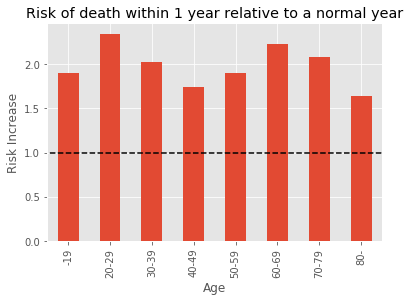

In [269]:
# Plot relative risk increase due to Covid

geo_china['ROD-1y relative to normal'].plot(kind='bar')

plt.title('Risk of death within 1 year relative to a normal year')
plt.ylabel('Risk Increase')

# add baseline risk:
plt.plot([-1, 9], [1, 1], "k--")

Text(0, 0.5, 'Risk Increase (%)')

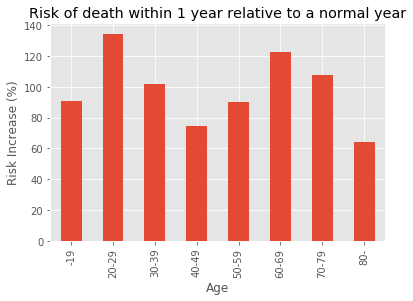

In [270]:
# Plot risk increase due to Covid in percentages

geo_china['Risk Increase (%)'].plot(kind='bar')

plt.title('Risk of death within 1 year relative to a normal year')
plt.ylabel('Risk Increase (%)')

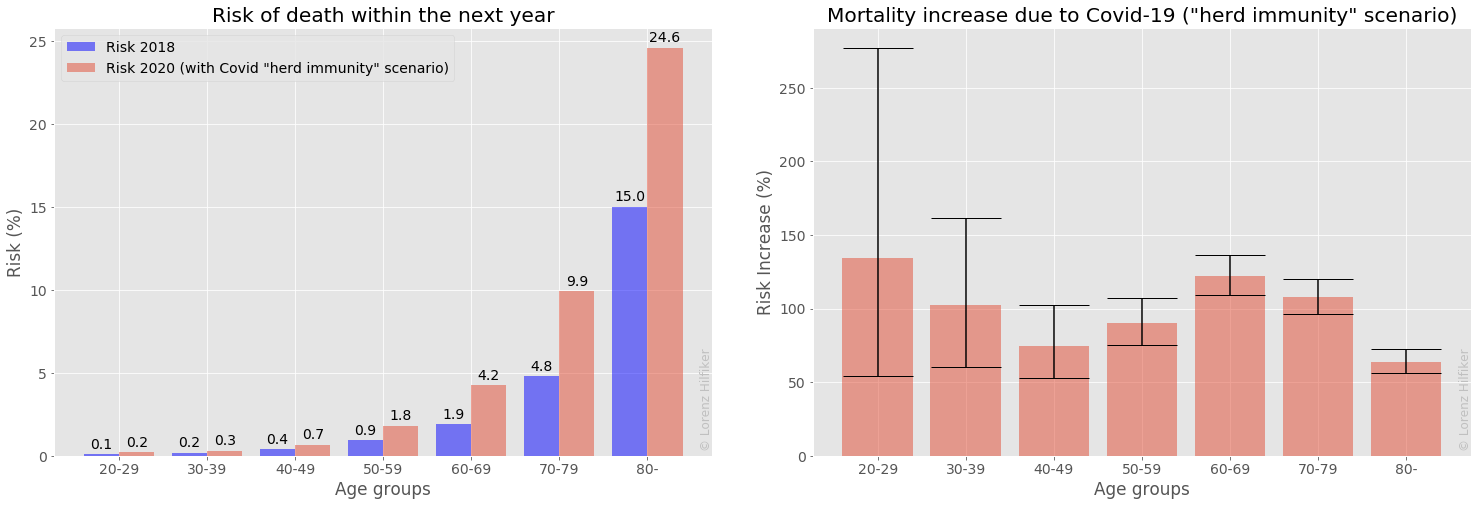

In [271]:
# Combined plot: 1) absolute risk of death (2018 and 2020) 2) increase in risk of death due to Covid (Herd immunity scenario)

# Data and error to be plotted

y_vals1 = 100*geo_china['ROD-1y 2018 Both Sexes'].iloc[1:].values
y_vals2 = y_vals1*geo_china['ROD-1y relative to normal'].iloc[1:].values

y_vals3 = geo_china['Risk Increase (%)'].iloc[1:].values
double_sigma = list(map(lambda expectation_value, conf_interval: (expectation_value-conf_interval[0], conf_interval[1]-expectation_value), geo_china['Risk Increase (%)'].iloc[1:].values, geo_china['Risk Increase (%) CI-95'].iloc[1:].values))
error = list(zip(*double_sigma))

# Build the plot

font = {'size': 14,
       'weight': 'normal'}
mpl.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,8))
width = 0.4

bars_2018 = ax1.bar(np.arange(len(y_vals1))-width/2, y_vals1, align='center', width=width, alpha=0.5, capsize=10, color='b', label='Risk 2018')
bars_2020 = ax1.bar(np.arange(len(y_vals2))+width/2, y_vals2, align='center', width=width, alpha=0.5, capsize=10, label='Risk 2020 (with Covid "herd immunity" scenario)')
ax1.set_title('Risk of death within the next year')
ax1.set_ylabel('Risk (%)')
ax1.set_xlabel('Age groups')
ax1.legend()
ax1.set_xticks(np.arange(len(y_vals1)))
ax1.set_xticklabels(geo_china.index.values[1:])

ax2.bar(np.arange(len(y_vals3)), y_vals3, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=35)
ax2.set_title('Mortality increase due to Covid-19 ("herd immunity" scenario)')
ax2.set_ylabel('Risk Increase (%)')
ax2.set_xlabel('Age groups')
ax2.set_xticks(np.arange(len(y_vals3)))
ax2.set_xticklabels(geo_china.index.values[1:])

ax1.text(6.6, 0.5, '© Lorenz Hilfiker', fontsize=12, color='silver', rotation=90)
ax2.text(6.6, 5.5, '© Lorenz Hilfiker', fontsize=12, color='silver', rotation=90)

# Put labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 1)
        ax1.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bars_2018)
autolabel(bars_2020)

# Save the figure and show
plt.tight_layout(pad=3)
plt.savefig('fatality_combined_plot.png')
plt.show()

In [272]:
# South Korean case fatality reference data (as a cross check)
# source https://www.statista.com/statistics/1105088/south-korea-coronavirus-mortality-rate-by-age/

# Note that the sample size is much smaller than for the Chinese data - hence significantly larger uncertainities!

korea_covid_fatality = {'Age': ['30-39', '40-49', '50-59', '60-69', '70-79', '80-'], 
                         'Korea CFR': [0.12, 0.09, 0.38, 1.37, 5.27, 9.26]}
korea_covid_fatality = pd.DataFrame(korea_covid_fatality)
korea_covid_fatality = korea_covid_fatality.set_index('Age', drop=True)
korea_covid_fatality.head()

,Korea CFR
Age,
30-39,0.12
40-49,0.09
50-59,0.38
60-69,1.37
70-79,5.27


In [273]:
# Make georgian data compatible with korean data

geodata_cut30 = geodata.iloc[2:]
geodata_cut30 = geodata_cut30.set_index(korea_covid_fatality.index)

# Merge korean fatality rates and Georgian demographic data into one dataframe

geo_korea = pd.concat([geodata_cut30, korea_covid_fatality], axis=1, sort=False)
geo_korea.head(10)

,Georgia Population 1994 Both Sexes,Georgia Population 1994 Males,Georgia Population 1994 Females,Georgia Population 1995 Both Sexes,Georgia Population 1995 Males,Georgia Population 1995 Females,Georgia Population 1996 Both Sexes,Georgia Population 1996 Males,Georgia Population 1996 Females,Georgia Population 1997 Both Sexes,...,ROD-1y 2016 Both Sexes,ROD-1y 2016 Males,ROD-1y 2016 Females,ROD-1y 2017 Both Sexes,ROD-1y 2017 Males,ROD-1y 2017 Females,ROD-1y 2018 Both Sexes,ROD-1y 2018 Males,ROD-1y 2018 Females,Korea CFR
Age,,,,,,,,,,,,,,,,,,,,,
30-39,709700.0,340300.0,369400.0,681801.0,326416.0,355385.0,656490.0,313931.0,342559.0,632152.0,...,0.001903,0.002937,0.000889,0.001599,0.002497,0.000712,0.001503,0.002317,0.000692,0.12
40-49,525200.0,245400.0,279800.0,584084.0,274435.0,309649.0,578341.0,271169.0,307172.0,572283.0,...,0.004312,0.006812,0.001944,0.004117,0.006350,0.001978,0.003856,0.006023,0.001762,0.09
50-59,598600.0,280600.0,318000.0,501491.0,232041.0,269450.0,471993.0,217291.0,254702.0,444173.0,...,0.010099,0.015554,0.005368,0.009268,0.014526,0.004665,0.009339,0.014523,0.004760,0.38
60-69,461000.0,193700.0,267300.0,451563.0,190820.0,260743.0,442832.0,188167.0,254665.0,434298.0,...,0.020747,0.031262,0.012863,0.019164,0.029315,0.011534,0.019068,0.029260,0.011384,1.37
70-79,251500.0,89800.0,161700.0,252125.0,91572.0,160553.0,252806.0,93210.0,159596.0,253249.0,...,0.055584,0.074301,0.044380,0.051734,0.069827,0.040945,0.047829,0.064804,0.037661,5.27
80-,84300.0,23700.0,60600.0,81711.0,22848.0,58863.0,79410.0,22074.0,57336.0,77195.0,...,0.165131,0.185345,0.155441,0.156102,0.170381,0.149281,0.149804,0.165079,0.142552,9.26


In [274]:
# Compute risk of death due to Covid, using georgian demographic data and South Korean Covid fatality data

share_infected = 10000/3700000
fatality_multiplier = 1
share_undetected = 0.4

geo_korea['ROD-1y Covid'] = list(map(lambda cfr: rod1y_covid(cfr, share_undetected, share_infected, fatality_multiplier),
                                     geo_korea['Korea CFR']))
geo_korea['ROD-1y relative to normal'] = list(map(lambda rod1y_normal, rod1y_covid: 
                                                  rod1y_rel_to_normal(rod1y_normal, rod1y_covid, share_preventable_deaths), 
                                                  geo_korea['ROD-1y 2018 Both Sexes'], geo_korea['ROD-1y Covid']))
geo_korea['Risk Increase (%)'] = list(map(lambda rel_risk_increase: rel_risk_increase*100 - 100, 
                                          geo_korea['ROD-1y relative to normal']))

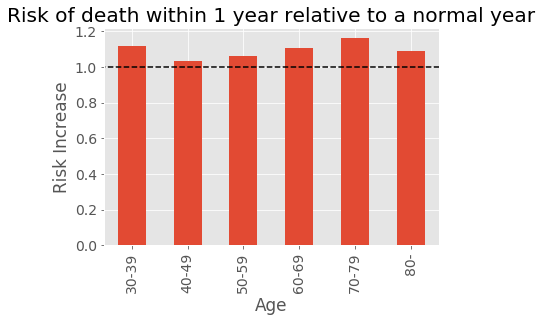

In [275]:
# Plot relative risk increase due to Covid

geo_korea['ROD-1y relative to normal'].plot(kind='bar')

plt.title('Risk of death within 1 year relative to a normal year')
plt.ylabel('Risk Increase')

# add baseline risk:
plt.plot([-1, 9], [1, 1], "k--")

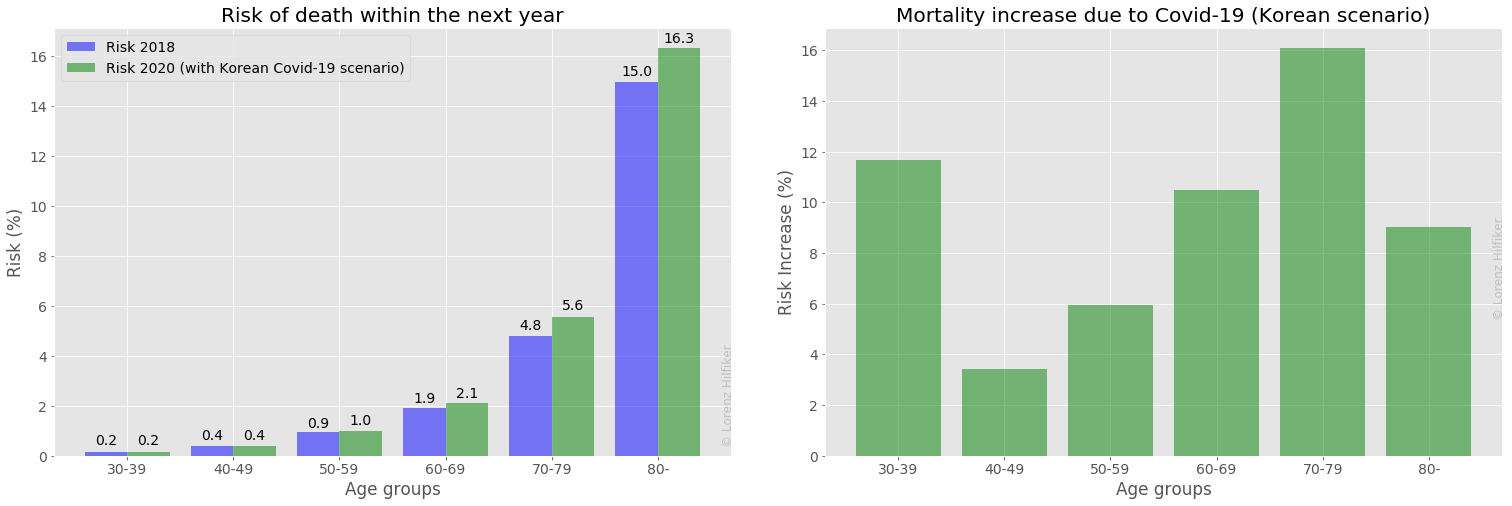

In [276]:
# Combined plot: 1) absolute risk of death (2018 and 2020) 2) increase in risk of death due to Covid (Korean scenario)

# Data to plot:

y_vals1 = 100*geo_korea['ROD-1y 2018 Both Sexes'].values
y_vals2 = y_vals1*geo_korea['ROD-1y relative to normal'].values

y_vals3 = geo_korea['Risk Increase (%)'].values

# Build the plot

font = {'size': 14,
       'weight': 'normal'}
mpl.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,8))
width = 0.4

bars_2018 = ax1.bar(np.arange(len(y_vals1))-width/2, y_vals1, align='center', width=width, alpha=0.5, capsize=10, color='b', label='Risk 2018')
bars_2020 = ax1.bar(np.arange(len(y_vals2))+width/2, y_vals2, align='center', width=width, alpha=0.5, capsize=10, color='g', label='Risk 2020 (with Korean Covid-19 scenario)')
ax1.set_title('Risk of death within the next year')
ax1.set_ylabel('Risk (%)')
ax1.set_xlabel('Age groups')
ax1.legend()
ax1.set_xticks(np.arange(len(y_vals1)))
ax1.set_xticklabels(geo_korea.index.values)

ax2.bar(np.arange(len(y_vals3)), y_vals3, align='center', alpha=0.5, capsize=35, color='g')
ax2.set_title('Mortality increase due to Covid-19 (Korean scenario)')
ax2.set_ylabel('Risk Increase (%)')
ax2.set_xlabel('Age groups')
ax2.set_xticks(np.arange(len(y_vals3)))
ax2.set_xticklabels(geo_korea.index.values)

ax1.text(5.6, 0.5, '© Lorenz Hilfiker', fontsize=12, color='silver', rotation=90)
ax2.text(5.6, 5.5, '© Lorenz Hilfiker', fontsize=12, color='silver', rotation=90)

# Put labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 1)
        ax1.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bars_2018)
autolabel(bars_2020)

# Save the figure and show
plt.tight_layout(pad=3)
plt.savefig('fatality_combined_plot_Korea.png')
plt.show()

In [277]:
# Cross-check with German instead of Georgian population data
# source: destatis.de
germandata = {'Age': ['20-29', '20-29', '20-49', '50-59', '60-'], 'Germany Population 2018': [3437000, 4763000, 5473000, 7518000, 12357000], 'Germany Deaths 2018': [2335, 4201, 10616, 38388, 412089]}
germandata = pd.DataFrame(germandata)
germandata['ROD-1y 2018'] = list(map(lambda p, d: d/p, germandata['Germany Population 2018'], germandata['Germany Deaths 2018']))
germandata = germandata.set_index('Age', drop=True)
germandata.head()

,Germany Population 2018,Germany Deaths 2018,ROD-1y 2018
Age,,,
20-29,3437000,2335,0.000679
20-29,4763000,4201,0.000882
20-49,5473000,10616,0.001940
50-59,7518000,38388,0.005106
60-,12357000,412089,0.033349


In [278]:
# Make german data compatible with chinese data
china_covid_fatality_cut2060 = china_covid_fatality[['China CFR']]
china_covid_fatality_cut2060 = merge_age_groups(china_covid_fatality_cut2060, [[0],[1],[2],[3],[4],[5, 6, 7]], 'Age')
china_covid_fatality_cut2060 = china_covid_fatality_cut2060[1:]
china_covid_fatality_cut2060 = china_covid_fatality_cut2060.rename(index={'60-69 and 70-79 and 80-': '60-'})
china_covid_fatality_cut2060.head()

germandata = germandata.set_index(china_covid_fatality_cut2060.index)

# Merge chinese fatality rates and german demographic data into one dataframe

german_china = pd.concat([germandata, china_covid_fatality_cut2060], axis=1, sort=False)
german_china.head(10)

,Germany Population 2018,Germany Deaths 2018,ROD-1y 2018,China CFR
Age,,,,
20-29,3437000,2335,0.000679,0.001934
30-39,4763000,4201,0.000882,0.002368
40-49,5473000,10616,0.001940,0.004434
50-59,7518000,38388,0.005106,0.012990
60-,12357000,412089,0.033349,0.263361


In [279]:
# Compute mortality risk increase with German mortality and chinese CFR:

share_infected = 0.6
fatality_multiplier = 1
share_undetected = 0.4

german_china['ROD-1y Covid'] = list(map(lambda cfr: rod1y_covid(cfr, share_undetected, share_infected, fatality_multiplier),
                                     german_china['China CFR']))
german_china['ROD-1y relative to normal'] = list(map(lambda rod1y_normal, rod1y_covid: 
                                                  rod1y_rel_to_normal(rod1y_normal, rod1y_covid, share_preventable_deaths), 
                                                  german_china['ROD-1y 2018'], german_china['ROD-1y Covid']))
german_china['Risk Increase (%)'] = list(map(lambda rel_risk_increase: rel_risk_increase*100 - 100, 
                                          german_china['ROD-1y relative to normal']))

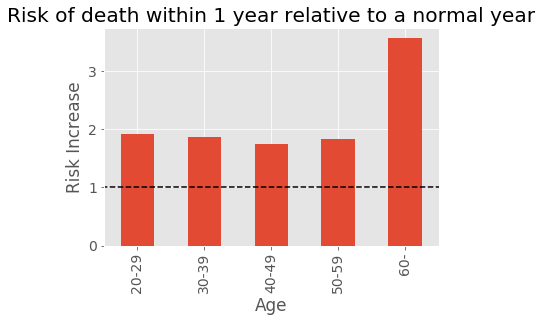

In [280]:
# Plot relative risk increase due to Covid

german_china['ROD-1y relative to normal'].plot(kind='bar')

plt.title('Risk of death within 1 year relative to a normal year')
plt.ylabel('Risk Increase')

# add baseline risk:
plt.plot([-1, 9], [1, 1], "k--")